# <center> **Revisiting Modern Portfolio Theory** <center>

In this notebook we discuss various concept of modern portfolio theory in the light of statistics .Modern Portfolio theory is one of key corner stone in the field of modern finace. With the introduction of **MPT** various portfolio optimization techniques were develop to measure the risk and return of the portfolio. In this notebook we discuss some of these concepts.
0. Data
1. Risk-Return Trade off
2. Returns are time independent
3. Distribution of returns.
4. Statistical Moments associated with assets.
5. Correlation between assets
6. Diversification Effect
7. Risk-Return distribution in 2D and 3D plane

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## **Data**
For the purpose of analysis we select nine stocks listed on NYSE. The data consist of daily adjusted closed price between the period 2009 and 2018 downloaded from [Yahoo Finance](https://finance.yahoo.com/). The name and symbol of the companies are given in the table.

| Company       | Symbol        | 
| ------------- |:--------:|
| Apple Inc     | **AAPL** |
| The American Express Company| **AXP**|
| The Boeing Company | **BA**|
|The Home Depot Inc | **HD** |
| Johnson & Johnson | **JNJ** |
| The Coca-Cola Company | **KO** | 
| Nike Inc | **NKE** |
| Pfizer Inc | **PFE** |
| The Procter & Gamble Company | **PG**|

In [4]:
# daily percentage change in the stock prices
df = pd.read_csv('./Dow_Nine.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df = df.pct_change()*100
df.dropna(inplace = True)
df.head()

,AAPL,AXP,BA,HD,JNJ,KO,NKE,PFE,PG
Date,,,,,,,,,
2009-01-02,6.326882,4.204809,6.046364,4.821839,1.370563,1.391631,4.039209,3.162061,1.585269
2009-01-05,4.220381,3.207473,2.033129,2.403642,-0.989311,-1.002138,0.716185,-0.602064,-0.716557
2009-01-06,-1.649387,5.613994,0.303264,2.225840,-0.599487,-1.606547,-2.020993,-1.982398,-0.288701
2009-01-07,-2.160832,-4.212493,-3.347022,-2.731606,-0.938181,0.492095,-3.628699,-1.741559,-1.753254
2009-01-08,1.856919,0.149888,0.067043,-0.732575,-0.186056,0.689931,1.843081,0.914801,-1.096905


## **Risk-Return Tradeoff**

Risk and Return show a positive relationship, this means that if the risk of a particular stock is high then the investor will demand more return to compensate the additional risk he is taking.

In the figure there are three stocks A, B, C with different risk and return combinations, a risk averse investor will invest in Stock A rather than Stock B because Stock A will give same level of return for lesser value of risk. Likewise a rational investor who is looking for more return will invest in Stock C rather than in Stock B because for the same level of risk Stock C is offering greater amount of return. In the Risk-Return plane a rational investor always try to move in north-west direction so he can minimise his risk and maximise his return, but doing both at the same time is not possible so investor make a trade off between risk and return

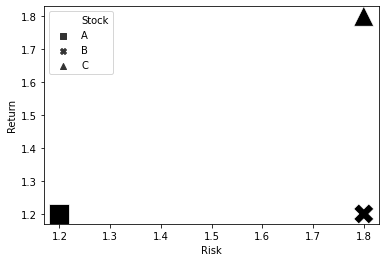

In [5]:
RRdf = pd.DataFrame({'Risk':[1.2,1.8, 1.8], 
                     'Return':[1.2,1.2,1.8],
                     'Stock':['A','B','C']}, index = [0,1,2])
sns.scatterplot(x = 'Risk', y = 'Return',style = 'Stock', markers = {"A":"s", "B":"X", "C":"^"}, data = RRdf, s = 400, color = 'black');

## **Returns are time independent**

The stock market returns are not dependent on previous period returns, the price of stock represents the current information of what is happening in the market i.e. they have short term memory. From plotting the returns for **t** (previous day) period against **t+1** (current day) period we can see that there is no correlation between them, stock returns are independent of previous day return.

From the scatter plot we can observe none of the asset have correlation with the previous day return.

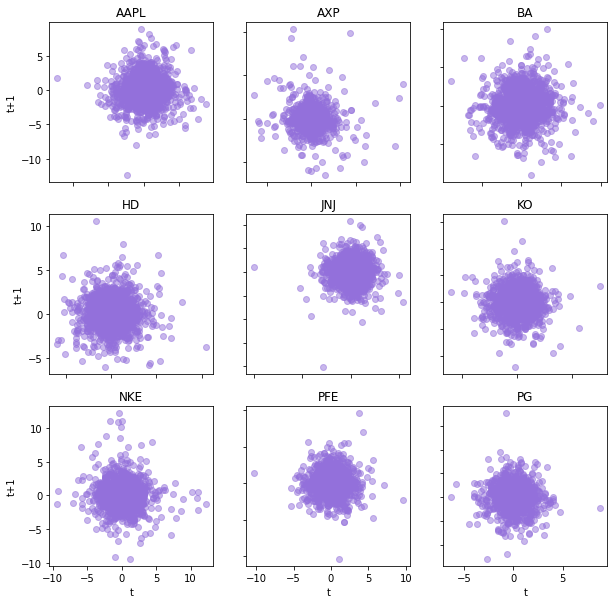

In [6]:
fig = plt.figure(figsize = (10,10))
i = 1
for company in df.columns:
    ax = fig.add_subplot(3, 3, i)
    ax.scatter(df[f'{company}'], df[f'{company}'].shift(), color = 'mediumpurple', alpha = 0.5)
    ax.set_title(f'{company}')
    ax.set_xlabel('t')
    ax.set_ylabel('t+1')
    ax.label_outer()
    i = i + 1

## **Distribution of returns**

We can cluster the daily returns in the form of histogram to check how returns are distributed in comparison to the Normal Distribution (red line), From our analysis we found that stock returns tend to be slightly skewed to left or right of the mean but are highly leptokurtic in nature i.e. they have fat tails on either side.

The fat tails are presence due to large number of outliers associated with daily return. The boxplots help us to capture the intensity of outliers associated with the distribution

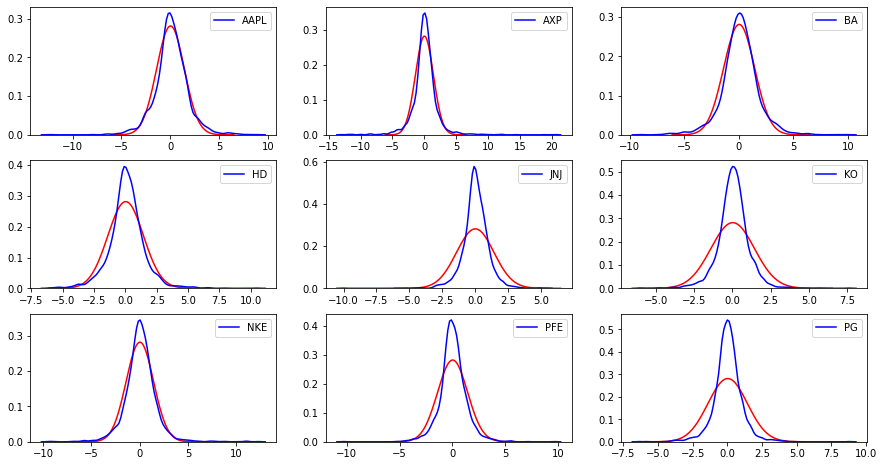

In [7]:
fig = plt.figure(figsize = (15, 8))
i = 1
Normal = np.random.normal(size = 2517)
for company in df.columns:
    ax = fig.add_subplot(3,3,i)
    sns.kdeplot(Normal, bw = 1.0, color = 'red', ax = ax)
    sns.kdeplot(df[f'{company}'], color = 'blue', ax = ax)
    i = i + 1

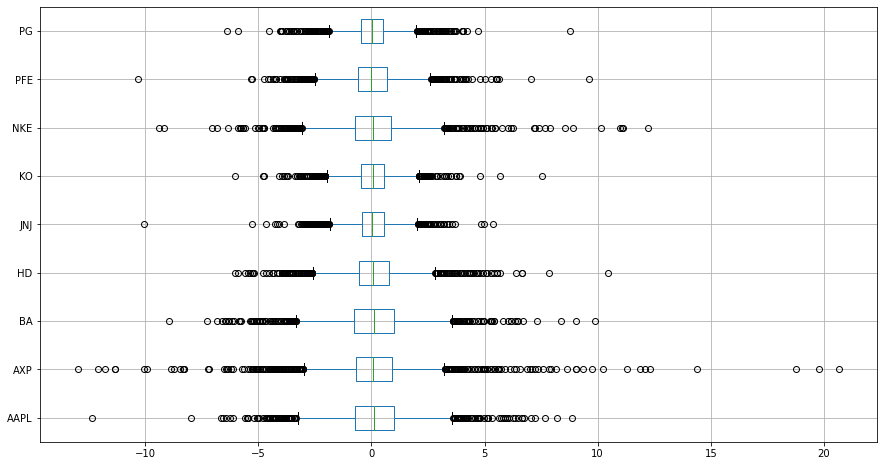

In [8]:
df.boxplot(figsize = (15,8), vert = False);

## **Statistical Moments associated with assets**

### **Mean**

The first moment give us the information about average stock return. The mean daily return tell us about how much an investor earn daily on his investment. Higher the mean better  the investment return. We can see AAPL is one of the most profitable stock on NYSE since 2009 , and there is a simple reason for that iPhone is a cash cow and hugely profitable for decade now.

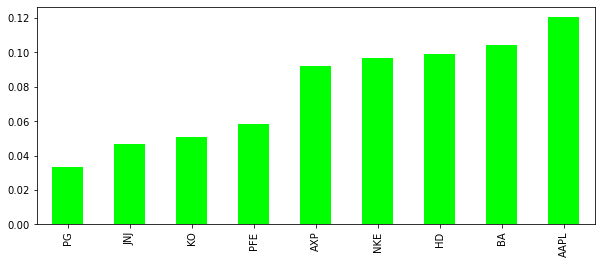

In [9]:
# Mean Return
df.mean().sort_values().plot(kind = 'bar', color = 'lime', figsize = (10, 4));

### **Standard Deviation**

The second statistical moment give us the standard deviation associated with the asset. The standard deviation tell us about the volatility of an asset i.e. how much an asset can deviate from its mean position (either in positive or negative direction). The lesser the standard deviation the better the asset is for investment because invester avoid securities which are volatile in nature. Also in this bar chart we can see AAPL is one of the higly volatile security

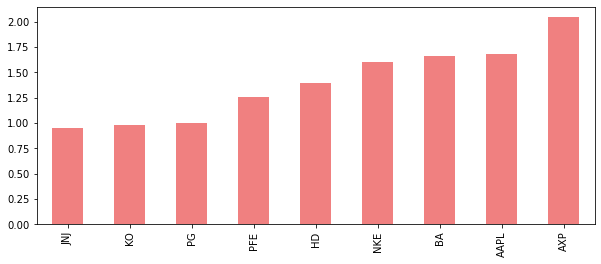

In [10]:
# SD
df.std().sort_values().plot(kind = 'bar', color = 'lightcoral', figsize = (10, 4));

### **Skewness**

The third moment tell us about skewness of the asset return. Skewness give us information about how asset returns are distributed around the mean value. Stocks with positive skewness are good to hold inside the portfolio. Most of the stock returns have close to zero skewness except for AXP, JNJ and NKE.

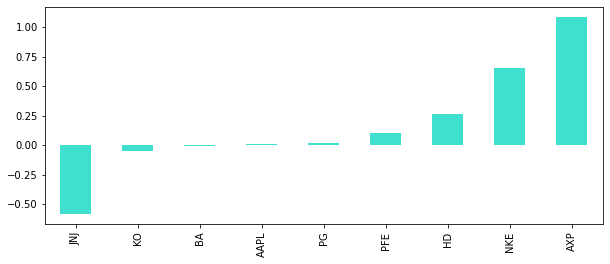

In [11]:
# Skewness
df.skew().sort_values().plot(kind = 'bar', color = 'turquoise', figsize = (10, 4));

### **Kurtosis**

The fourth moment (kurtosis) is associated with the taildness of stock returns. Unlike Normal distribution stock returns are heavily leptokurtic in nature , the presence of fat tails is due to huge volatility observed on certain days. High kurtosis stocks tends to be more volatile and risky to hold in the portfolio.

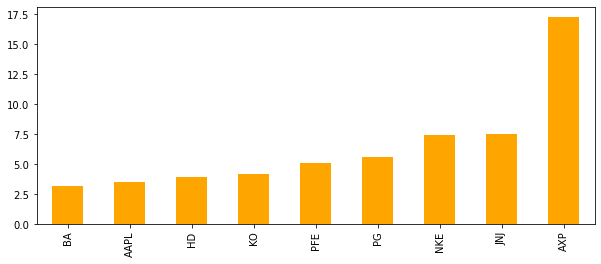

In [12]:
# kurtosis
df.kurtosis().sort_values().plot(kind = 'bar', color = 'orange', figsize = (10, 4));

### **Sharpe Ratio**

There is one other measure called **Sharpe Ratio**. Sharpe Ratio is a ratio of Mean Return and Standard Deviation. It tell us about the asset return per unit risk. Stocks with high Sharpe Ratio are desired to keep inside portfolio. AAPL has highest return per unit risk

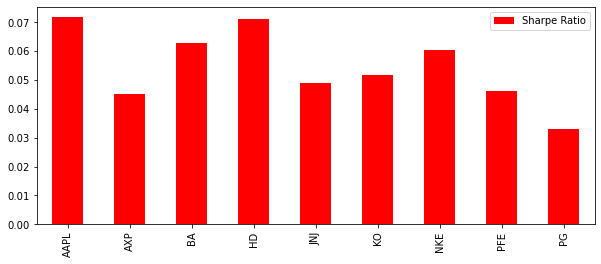

In [13]:
# Sharpe Ratio
s_ratio = pd.DataFrame({'Sharpe Ratio': df.mean()/df.std()}, index = df.columns)
s_ratio.plot(kind = 'bar', color = 'red', figsize = (10, 4));

## **Correlation between assets**

The correlation coefficient shows the degree and direction of daily movement of two stocks. Investors try to find pair of stocks that have low correlation in order to get minimum risk. With the help of correlation we can find out if the market is under stress or not.

In the given figure we can see correlation between the stocks started to rise in 2009 and peaked in the year 2011 when [US was downgraded](https://en.wikipedia.org/wiki/United_States_federal_government_credit-rating_downgrades) by S&P this was followed by [Black Monday](https://en.wikipedia.org/wiki/Black_Monday_(2011)) event of 2011 when Dow fall more than 600 points. We can see that in the year 2011 the correlation between all the stocks increased, this was due to high stress in the Stock market. Entire financial system was under threat from rising deficit. From the year 2014 the markets start to become normal again

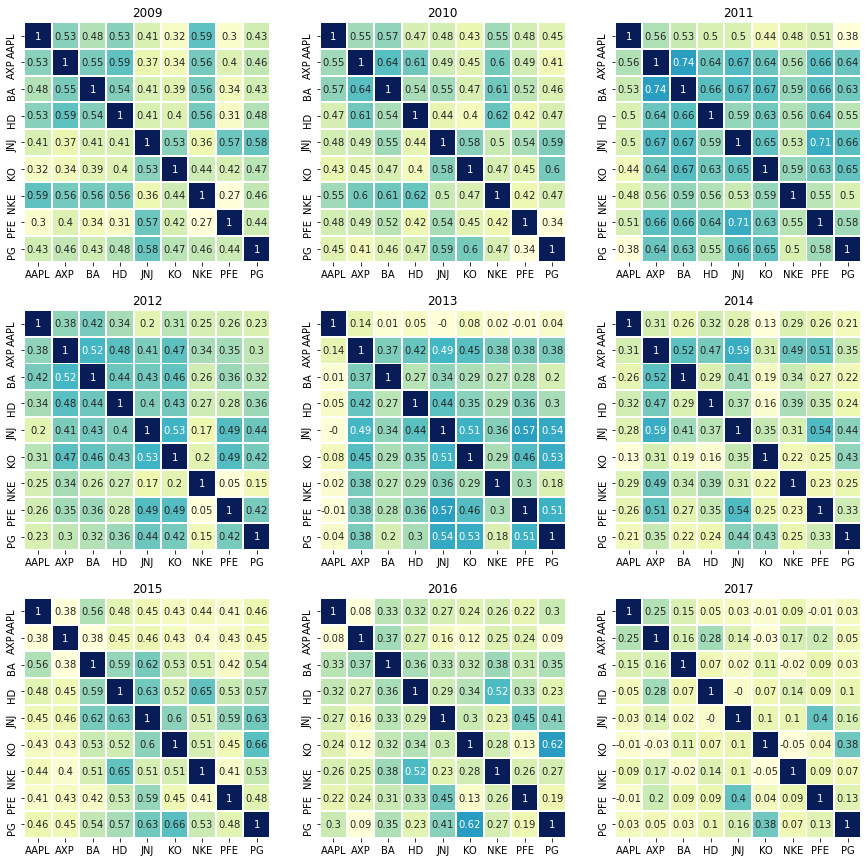

In [14]:
fig = plt.figure(figsize = (15,15))
date = ['2009-01-02', '2010-01-02', '2011-01-02', '2012-01-02', '2013-01-02',
        '2014-01-02', '2015-01-02', '2016-01-02', '2017-01-02', '2018-01-02']
Year = ['2009', '2010', '2011', '2012', '2013',
        '2014', '2015', '2016' , '2017']
for i in np.arange(9):
    cor = np.round(df[date[i]:date[i+1]].corr(), decimals =2)
    m = np.min(cor.min())
    ax = fig.add_subplot(3, 3, i+1)
    sns.heatmap(cor, vmin = m, linewidths = 0.9, annot= True,  cmap='YlGnBu' , cbar = False, ax = ax)
    ax.set_title(f'{Year[i]}')

## **Diversification Effect**

Diversification is at the heart of **MPT**. MPT argues that a portfolio consisting of several stocks will be less risk inherent than investing in a single stock. The diversification of portfolio only reduces **Specific Risk** or **Unsystematic Risk**. Individual companies are prone to some unique risks, these risk are called **Specific Risk** they are diversifiable. On the other hand we can't reduce **Systematic Risk** because market is connceted to a complicated economic web, therefore all companies are exposed equally expose to the market risk.

In [15]:
# Equal weighted portfolio
weighted_portfolio = np.zeros((9,9))
for i in np.arange(9):
    weighted_portfolio[i,0:i+1] = np.repeat(1/(i+1), i+1)
weighted_portfolio = np.round(weighted_portfolio, decimals = 3)
weighted_portfolio

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.333, 0.333, 0.333, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.25 , 0.25 , 0.25 , 0.25 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.   , 0.   , 0.   , 0.   ],
       [0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.   , 0.   , 0.   ],
       [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.   , 0.   ],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.   ],
       [0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111]])

In the figure below we can see that with each additional asset the Standard Deviation (Risk) of the portfolio is decreasing but the rate of decreas is diminishing with each additional asset. After adding six assets to our portfolio the rate of decrase is not much significant.

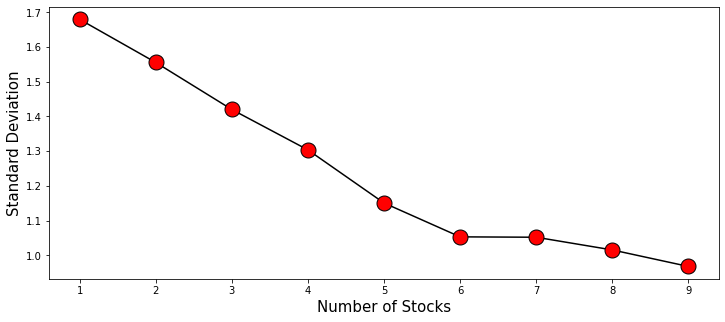

In [16]:
w = np.asmatrix(weighted_portfolio)
c = np.asmatrix(df.cov())
SD = np.zeros(9)
for i in np.arange(9): 
    SD[i] = np.sqrt(w[i] * c * (w[i].T))
Diversification = pd.DataFrame({'SD': SD}, index = np.arange(1,10))
Diversification.plot(color = 'black', marker = 'o', markerfacecolor = 'red', 
                     markersize = 15 , figsize = (12,5), legend = False)
plt.xlabel('Number of Stocks', fontsize = 15)
plt.ylabel('Standard Deviation',fontsize = 15);

Also we can sobserve the daily volatility of an equal  weighted portfolioin in  comparison to individual stocks by clustering the change of daily returns. From the figure we can observe that the portfolio (Black Line) is much less volatile than individual stocks in most cases.

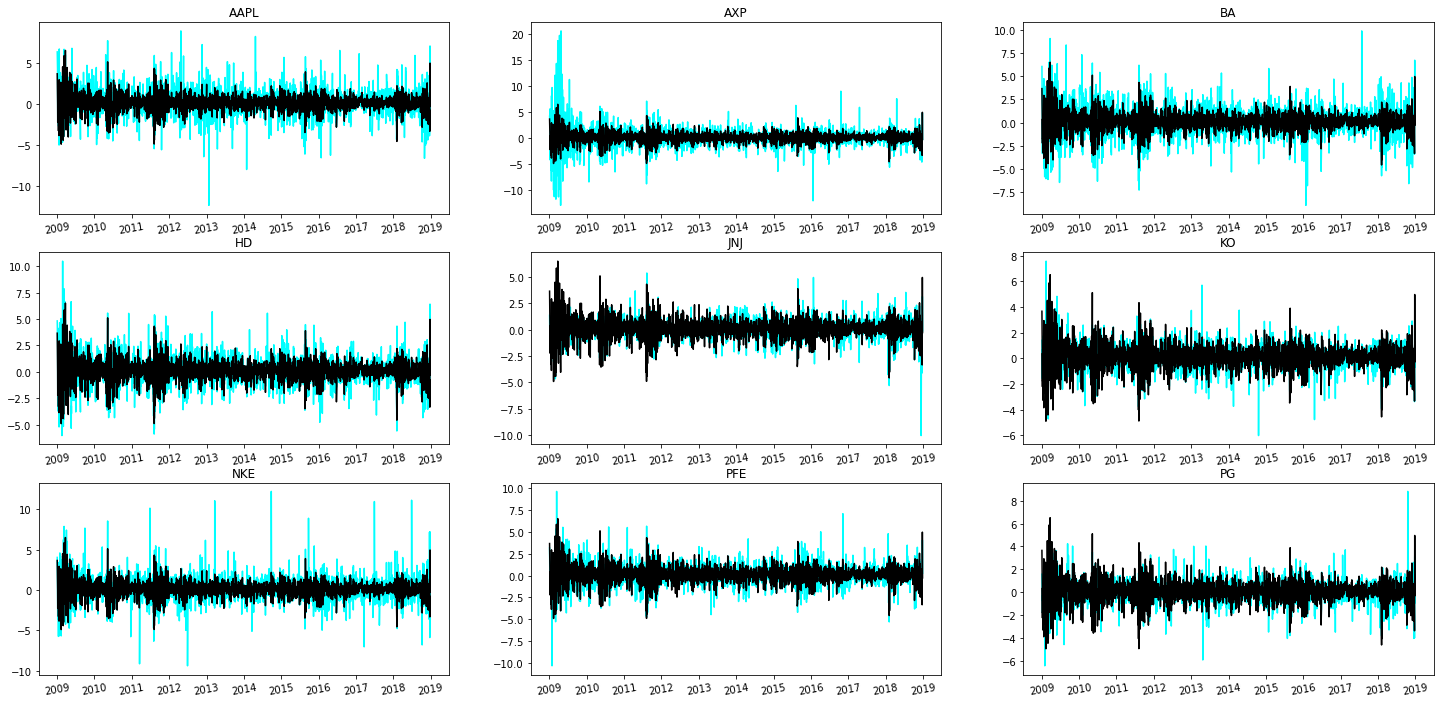

In [17]:
w = weighted_portfolio[8]
p = np.asmatrix(df)
a = w * p.T
df['Portfolio'] = a.T
fig = plt.figure(figsize = (25, 12))
i = 1
for company in df.columns[0:9]:
    ax = fig.add_subplot(3, 3, i)
    ax.plot(df[f'{company}'], color = 'cyan')
    ax.plot(df['Portfolio'], color = 'black')
    ax.set_title(f'{company}')
    plt.xticks(rotation=10)
    i = i+1

## **Risk-Return distribution in 2D and 3D plane**

The investor has a choice of various combinations of risk and return depending on his choice of portfolio. The Mean-Variance rule state that the investor want to select one of those portfolios which give rise to an efficient portfolio, i.e. those with the minimum variance for a given return or vice versa.

The Risk and Return distribution can be constructed by simulating thousands of combinations of different weights associated with the stocks in the portfolio. We found the resulting plane is parabolic in nature. Most of the efficient portfolio (highest Sharpe ratio) lie at the upper half of the parabola close to the edge. The combination of these porfolio is called Efficient Frontier.

In [18]:
df.drop(columns = ['Portfolio'], inplace = True)
Mean = np.zeros(5000)
SD = np.zeros(5000)
Sharpe = np.zeros(5000)
for i in np.arange(5000):
    k = np.random.normal(size = (df.shape[1]))
    k = np.asmatrix(k/sum(k))
    p = np.asmatrix(df.mean())
    c = np.asmatrix(df.cov())
    mu = k[0] * p.T
    sigma = np.sqrt(k[0] * c * (k[0].T))
    if sigma[0, 0] > 2 :
        ()
    else:
        Mean[i] = mu
        SD[i] = sigma[0,0]
        Sharpe[i] = mu/sigma[0,0]
Simulation_df = pd.DataFrame({'Mean': Mean, 'SD': SD, 'Sharpe':Sharpe}, index = np.arange(5000))
Simulation_df = Simulation_df.replace(0, np.NaN).dropna(axis = 0)
print(Simulation_df.shape)

(2790, 3)


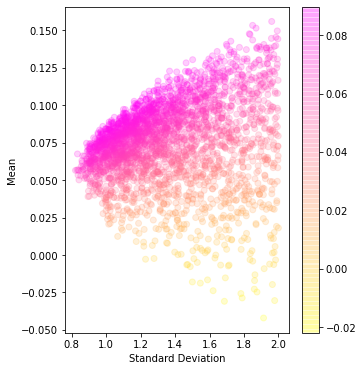

In [19]:
fig = plt.figure(figsize = (5,6))
plt.scatter(Simulation_df['SD'], Simulation_df['Mean'],c = Simulation_df['Sharpe'], cmap = 'spring_r', alpha = 0.2)
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.colorbar();

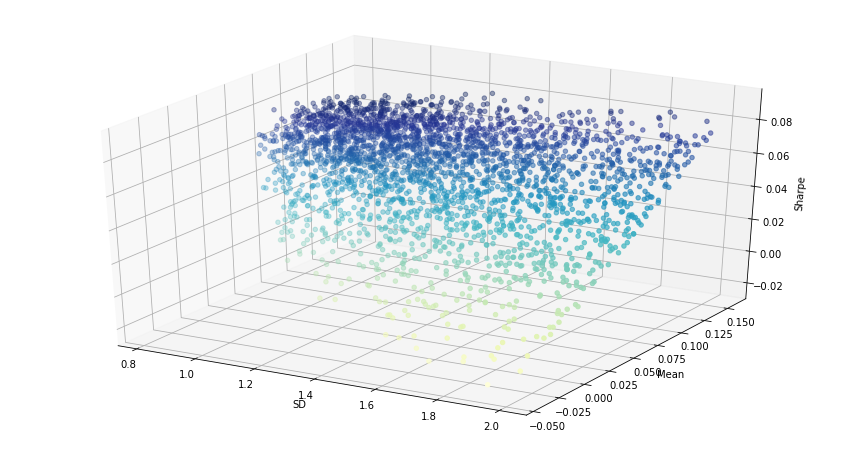

In [20]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Simulation_df['SD'], Simulation_df['Mean'], Simulation_df['Sharpe'], c = Simulation_df['Sharpe'], cmap = 'YlGnBu', marker = 'o')
ax.set_xlabel('SD')
ax.set_ylabel('Mean')
ax.set_zlabel('Sharpe');